# Iceberg Bobbing
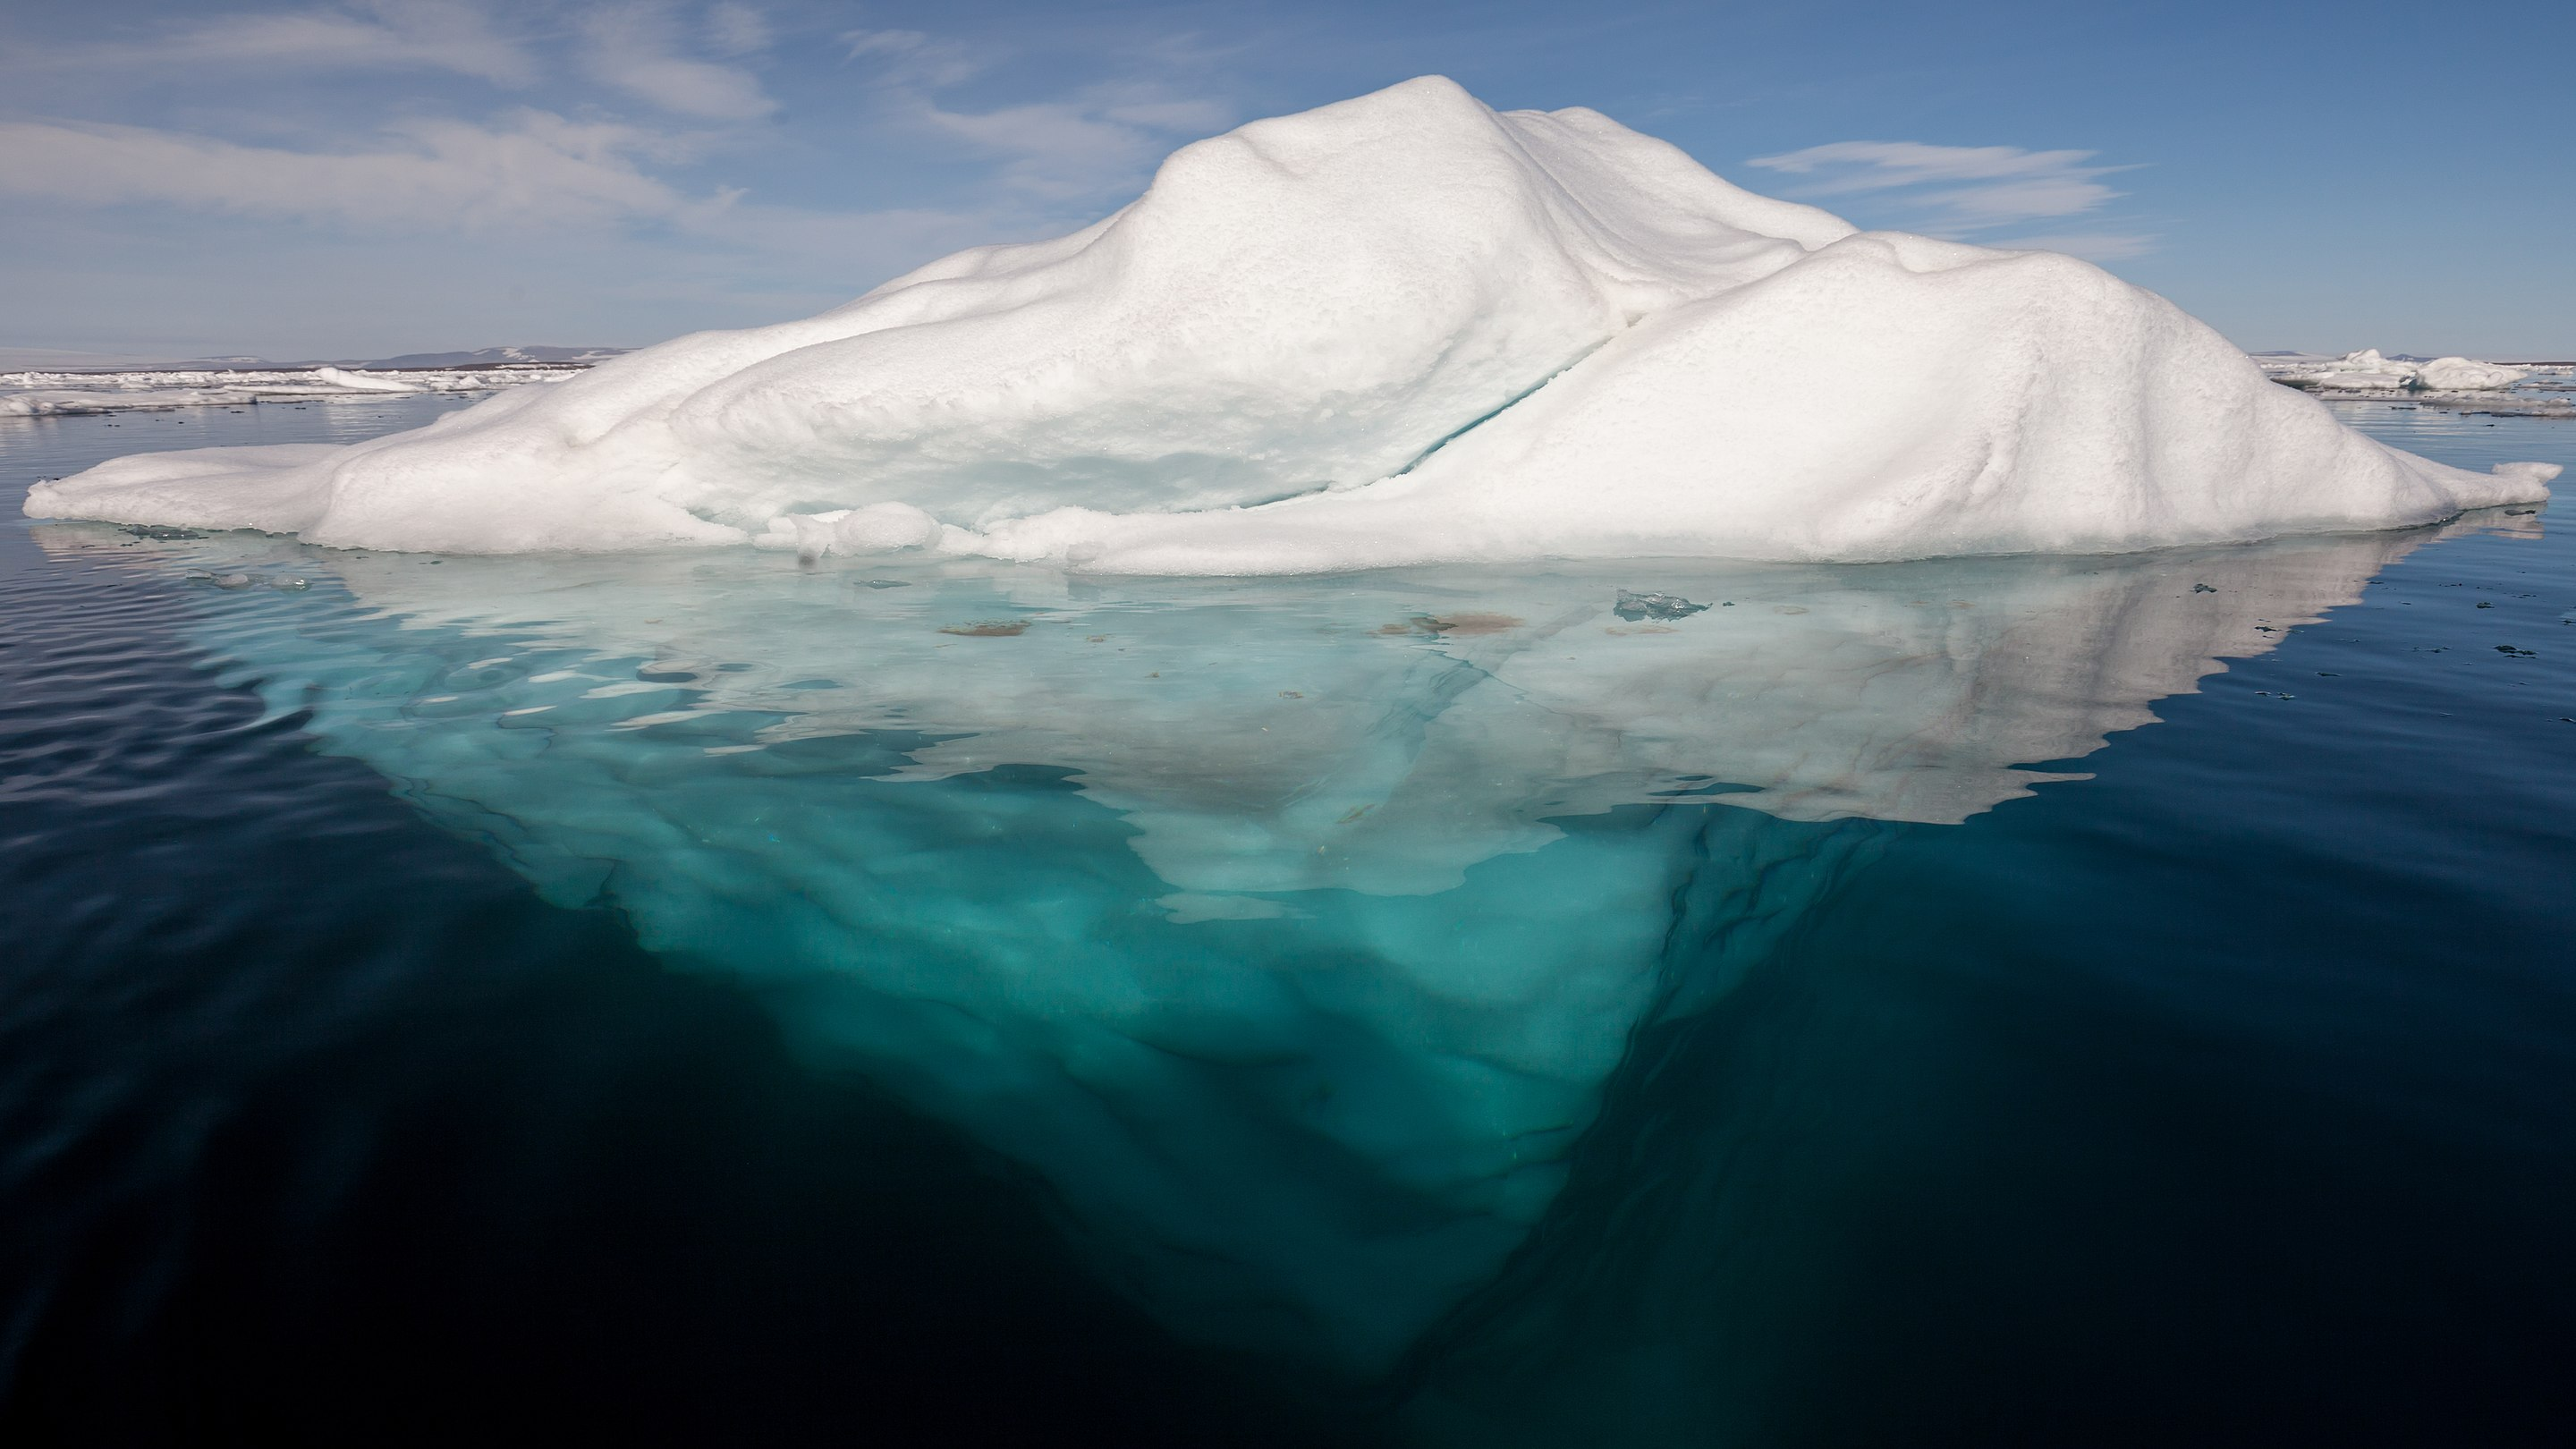
*Image from Wikipedia*

In this assignment, we're going to examine the vertical bobbing motions of an iceberg.  Our starting point is Newton's Second Law of motion, 
$$F=MA.$$

### Static (non-moving) iceberg
In class we discussed the situation where the iceberg doesn't move and $A=0$.  In that case, the weight of the iceberg is balanced by the water pressure at the bottom of the iceberg:
$$\rho_{ice} V_{ice} g = \rho_{water} V_{displaced-water} g.$$
In this equation, $\rho_{ice}$ and $\rho_{water}$ are the densities of ice and water (units kg/m$^3$), $g$ is the acceleration due to gravity (units m/s$^2$), and $V_{ice}$ and $V_{displaced-water}$ are the volumes occupied by ice and by the water displaced by the ice.

This equation is sometimes called Archimede's Principle.  We're going to start by writing both of these contributions as Python functions.  

In [ ]:
# As usual, we start by importing some functions that we'll use later on.
from scipy.integrate import solve_ivp  # A solver to solve the equations
from numpy import linspace             # Makes sequential arrays of numbers
import matplotlib.pyplot as plt # Makes plots

**Part 1: Complete the following functions using a python return statement**

In [ ]:
def weight_of_ice(ice_density,ice_volume,gravity):
    '''
    Inputs:  ice density, ice volume, and gravitational acceleration
    Outputs: the force due to the weight of the ice
    '''
    # Write code here

    
def bottom_water_pressure(water_density,water_volume,gravity):
    '''
    Inputs:  ice density, water volume, and gravitational acceleration
    Outputs: the force due to water pressure at the bottom of the iceberg
    '''
    # Write code here


**Part 2: plug in some numbers and use these functions to calculate forces**.
What is the water pressure on the bottom of a 100m thick iceberg?

In [ ]:
rho_ice = 910      # units kg/m^3
rho_water = 1000   # units kg/m^3
g = 9.81           # units m/s^2

length = 10        # units m
width  = 10        # units m
height = 10        # units m

V_ice = length*width*height
M_ice = V_ice*rho_ice

V_water = V_ice  # Initially, we assume that the ice is in equilibrium

# Write code here


### Bobbing Motion
If the two forces (water pressure and weight) are not equal, then this force imbalance will cause motion and $A$ will be nonzero. These following two functions expresses $F=MA$.

In [ ]:
def force_balance(t,y,density_of_water,ice_thickness):
    '''
    This function calculates returns acceleration A = F/M and velocity v of the iceberg
    '''
    w,v = y 

    # This is the thickness for the iceberg "draft" (depth of ice below the water) 
    # that we derived in class:
    water_thickness = rho_ice / density_of_water * ice_thickness

    pressure = bottom_water_pressure(density_of_water,water_thickness-w,g)
    
    weight = weight_of_ice(rho_ice,ice_thickness,g)
    
    F = pressure - weight
    M = ice_thickness * rho_ice
    
    A = F/M
    return [v, A]

def solve_force_balance(start_time = 0,end_time = 100,initial_displacement = 1,
                       density_of_water=1000,ice_thickness=100):
    '''
    This function actually solves the equations. 
    Returns a time vector and a vector of displacements
    '''
    sol = solve_ivp(force_balance, 
                [start_time,end_time], 
                [initial_displacement,0],
                t_eval=linspace(start_time,end_time,1000),
                args = (density_of_water,ice_thickness))
    return sol.t, sol.y[0]

def plot_solution(tt,dd,f):
    '''
    This function plots the solution in a nice way
    '''
    fig,ax=f
    fig.patch.set_facecolor('w')
    ax.plot(tt,dd)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Displacement (m)')
    plt.grid(True)

We can now solve the equation to calculate the vertical displacements of the iceberg through time and plot the solution. 

**Part 3: Varing water depth**
The code below runs with an ice thickness of 1000m. That's pretty thick for floating ice! Most icebergs aren't that thick. What happens if the you run the calculation again with a thickness of 10m? or 100m?  Do thicker icebergs bob slower or faster? Why?

In [ ]:
f=plt.subplots(figsize=(10,5))                 # Make a new plot

t,d = solve_force_balance(ice_thickness=1000)       # Solve the the force balance equation
plot_solution(t,d,f)                               # Plot the solution

# Write code here

**Part 4: Varing salinity depth**
Repeat the above calculation by accounting for salinity variations.  You could set the density by giving the function ```solve_force_balance``` the optional argument ```water_density=something```.  The above simulations used a density of 1000 kg/m$^3$.  The highest values for seawater approve about 1030 kg/m$^3$. How big of an effect does this change have on the bobbing frequency?

In [ ]:
# Write code here